# Danish E-commerce: Exploratory Data Analysis (EDA)
- Michael Schannong




In [1]:
%config InlineBackend.figure_format = 'retina'

## 1. Importér pakker



In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



plt.rcParams["figure.figsize"] = (10,5)

### Indlæs data

In [94]:
# Indlæs data
products = pd.read_csv('../data/products_dk.csv')
orders = pd.read_csv('../data/orders_dk.csv')
customers = pd.read_csv('../data/customers_dk.csv')

df = (
    orders
    .merge(products[["product_id", "product_name", "product_category"]], on="product_id")
    .merge(customers[["customer_id", "customerName"]], on="customer_id")
)


 #### Indlæs datasættene

In [79]:
products.head()
products.info()
products.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_id          20 non-null     object 
 1   product_name        20 non-null     object 
 2   product_category    20 non-null     object 
 3   manufacturing_city  20 non-null     object 
 4   size                20 non-null     object 
 5   color               20 non-null     object 
 6   SKU                 20 non-null     object 
 7   Amount              20 non-null     int64  
 8   unit_price          20 non-null     float64
 9   active              20 non-null     bool   
dtypes: bool(1), float64(1), int64(1), object(7)
memory usage: 1.6+ KB


,Amount,unit_price
count,20.000000,20.000000
mean,335.400000,2110.566000
std,161.773201,1301.346619
min,47.000000,254.740000
25%,192.000000,1162.727500
50%,363.000000,2013.165000
75%,463.250000,2883.425000
max,590.000000,4498.330000


In [80]:
orders.info()
orders.head()
orders.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   order_id        5000 non-null   object 
 1   product_id      5000 non-null   object 
 2   customer_id     5000 non-null   object 
 3   quantity        5000 non-null   int64  
 4   TotalPrice      5000 non-null   float64
 5   order_date      5000 non-null   object 
 6   shipping_date   5000 non-null   object 
 7   order_status    5000 non-null   object 
 8   payment_method  5000 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 351.7+ KB


,quantity,TotalPrice
count,5000.000000,5000.000000
mean,3.479800,6988.243272
std,1.704868,5992.307008
min,1.000000,254.740000
25%,2.000000,2064.710000
50%,3.000000,5383.320000
75%,5.000000,10597.380000
max,6.000000,26989.980000


In [81]:
customers.head()
customers.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     1200 non-null   object
 1   customerName    1200 non-null   object
 2   Adresse         1200 non-null   object
 3   Post_nummer     1200 non-null   int64 
 4   Telefon_nummer  1200 non-null   object
dtypes: int64(1), object(4)
memory usage: 47.0+ KB


In [82]:
products["product_category"].value_counts()

product_category
Elektronik        11
Tøj                4
Bolig & Køkken     4
Kontor             1
Name: count, dtype: int64

In [83]:
orders["order_status"].value_counts()

order_status
Afsendt       2942
Leveret       1313
Annulleret     498
Returneret     247
Name: count, dtype: int64

Join tabeller

In [84]:
df = (
    orders
    .merge(products, on="product_id", how="left")
    .merge(customers, on="customer_id", how="left")
)

df.isnull().sum()

order_id              0
product_id            0
customer_id           0
quantity              0
TotalPrice            0
order_date            0
shipping_date         0
order_status          0
payment_method        0
product_name          0
product_category      0
manufacturing_city    0
size                  0
color                 0
SKU                   0
Amount                0
unit_price            0
active                0
customerName          0
Adresse               0
Post_nummer           0
Telefon_nummer        0
dtype: int64

In [85]:
df["TotalPrice"].sum()

np.float64(34941216.36)

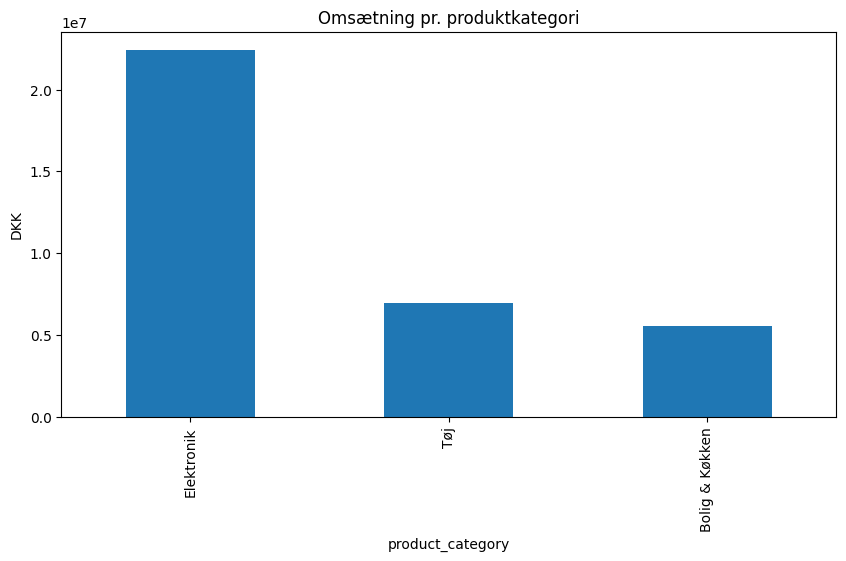

In [86]:
revenue_by_category = (
    df.groupby("product_category")["TotalPrice"]
      .sum()
      .sort_values(ascending=False)
)

revenue_by_category

revenue_by_category.plot(kind="bar")
plt.title("Omsætning pr. produktkategori")
plt.ylabel("DKK")
plt.show()

Text(0, 0.5, 'DKK')

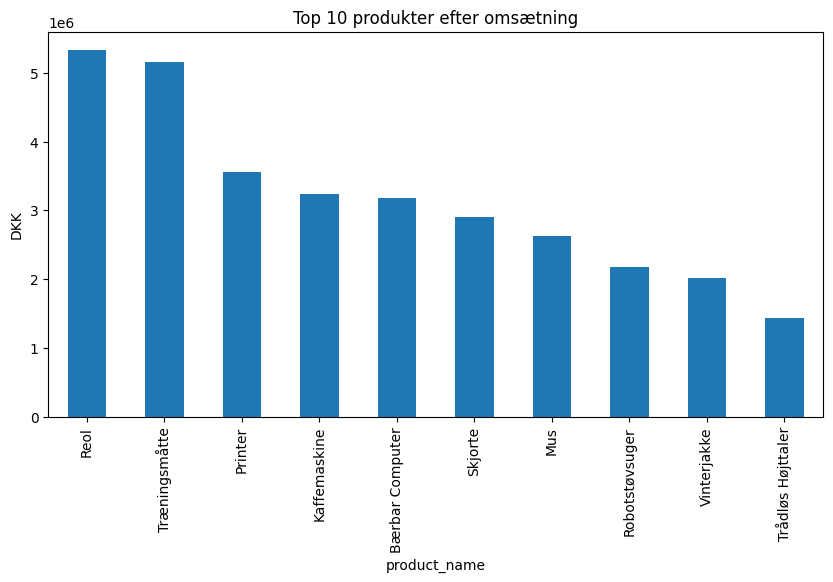

In [87]:
top_products = (
    df.groupby("product_name")["TotalPrice"]
      .sum()
      .sort_values(ascending=False)
      .head(10)
)
top_products.plot(kind="bar")

plt.title("Top 10 produkter efter omsætning")
plt.ylabel("DKK")


ER DER VARE SOM IKKE BLIVER SALGT


In [88]:
products_without_orders = products[
    ~products["product_id"].isin(orders["product_id"])
]

products_without_orders

,product_id,product_name,product_category,manufacturing_city,size,color,SKU,Amount,unit_price,active
6,P1007,Kontorstol,Bolig & Køkken,Kolding,M,Sort,DK-9777-gFq,490,2726.52,True
7,P1008,Skrivebordslampe,Kontor,Esbjerg,XS,Grå,DK-3565-Bdd,320,4163.08,True
10,P1011,Elkedel,Tøj,Aalborg,S,Blå,DK-0129-YMP,383,1125.58,True
12,P1013,"Monitor 27""",Elektronik,Esbjerg,L,Blå,DK-0026-HHU,590,1175.11,True
14,P1015,Tastatur,Elektronik,Kolding,One Size,Blå,DK-7179-Uen,237,3310.65,True


<Axes: xlabel='customerName'>

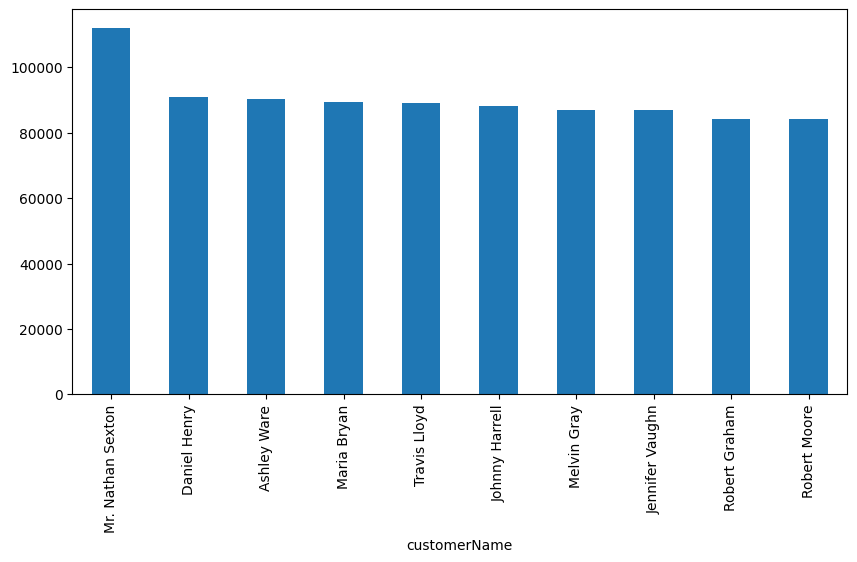

In [89]:
top_customers = (
    df.groupby("customerName")["TotalPrice"]
      .sum()
      .sort_values(ascending=False)
      .head(10)
)

top_customers.plot(kind="bar")

In [90]:
df["TotalPrice"].mean()

np.float64(6988.243272)

### Antal anuleret ordre

In [91]:
cancelled_orders = orders[orders["order_status"] == "Annulleret"]

total_orders = len(orders)
cancelled_count = len(cancelled_orders)

cancelled_rate = cancelled_count / total_orders * 100

cancelled_count, round(cancelled_rate, 2)

(498, 9.96)

In [99]:
cancelled_orders = orders[orders["order_status"] == "Returneret"]

total_orders = len(orders)
cancelled_count = len(cancelled_orders)

cancelled_rate = cancelled_count / total_orders * 100

cancelled_count, round(cancelled_rate, 2)

(247, 4.94)

In [92]:

orders_with_products = orders.merge(
    products[["product_id", "product_name"]],
    on="product_id",
    how="left"
)
cancelled_orders = orders_with_products[
    orders_with_products["order_status"] == "Annulleret"
]

cancelled_by_product = (
    cancelled_orders
    .groupby("product_name")["order_id"]
    .count()
    .sort_values(ascending=False)
    .head(10)
)

cancelled_by_product

product_name
Vinterjakke          44
Bluetooth Headset    40
Smart TV             39
Printer              37
Trådløs Højttaler    35
Reol                 35
Løbesko              35
Robotstøvsuger       33
Kaffemaskine         33
Mus                  33
Name: order_id, dtype: int64

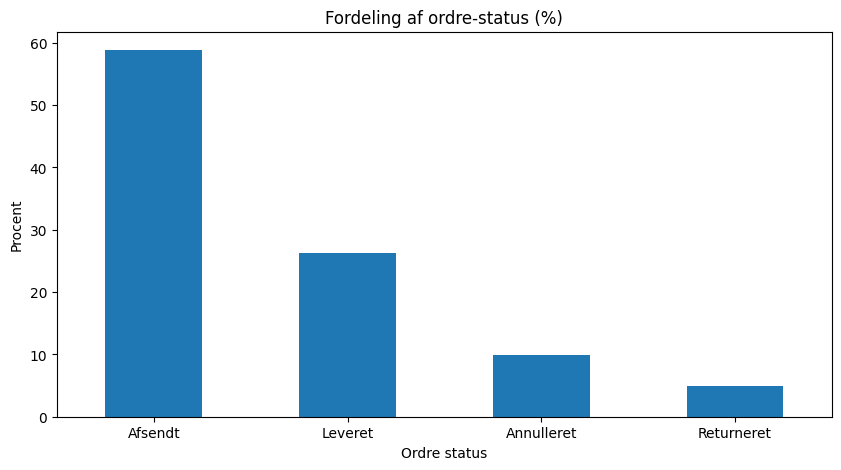

In [102]:
status_pct = orders["order_status"].value_counts(normalize=True) * 100

status_pct.plot(kind="bar")
plt.title("Fordeling af ordre-status (%)")
plt.xlabel("Ordre status")
plt.ylabel("Procent")
plt.xticks(rotation=0)
plt.show()

In [103]:

orders["order_date"] = pd.to_datetime(orders["order_date"])
orders["shipping_date"] = pd.to_datetime(orders["shipping_date"])

afsendt = orders[orders["order_status"] == "Afsendt"]

afsendt["days_since_shipping"] = (
    pd.Timestamp.today() - afsendt["shipping_date"]
).dt.days

afsendt["days_since_shipping"].describe()

C:\Users\Micha\AppData\Local\Temp\ipykernel_7184\3028999527.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  afsendt["days_since_shipping"] = (


count    2942.000000
mean     1028.479946
std       257.176982
min       569.000000
25%       804.250000
50%      1030.000000
75%      1254.000000
max      1471.000000
Name: days_since_shipping, dtype: float64

In [104]:
problem_orders = afsendt[afsendt["days_since_shipping"] > 14]

len(problem_orders)


2942

In [105]:
afsendt_products = afsendt.merge(
    products[["product_id", "product_name", "product_category"]],
    on="product_id"
)

afsendt_by_product = (
    afsendt_products
    .groupby("product_name")["order_id"]
    .count()
    .sort_values(ascending=False)
    .head(10)
)

afsendt_by_product

product_name
Printer              225
Mus                  221
Reol                 206
Kaffemaskine         204
Trådløs Højttaler    200
Træningsmåtte        196
Vinterjakke          193
Løbesko              191
Bluetooth Headset    191
Skjorte              188
Name: order_id, dtype: int64

In [106]:
afsendt_by_category = (
    afsendt_products
    .groupby("product_category")["order_id"]
    .count()
    .sort_values(ascending=False)
)

afsendt_by_category

product_category
Elektronik        1770
Tøj                587
Bolig & Køkken     585
Name: order_id, dtype: int64

In [107]:
afsendt["payment_method"].value_counts(normalize=True) * 100


payment_method
Faktura       26.682529
MobilePay     24.847043
Dankort       24.677090
Kreditkort    23.793338
Name: proportion, dtype: float64

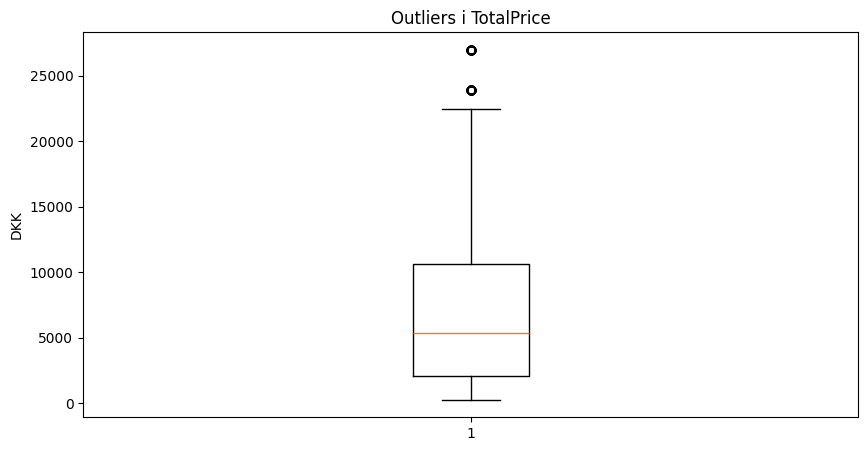

In [109]:
plt.boxplot(orders["TotalPrice"])
plt.title("Outliers i TotalPrice")
plt.ylabel("DKK")
plt.show()
